# ML LAB 11 - October 14, 2020 | Aaqib Ahmad (1947101) 

## **Demonstrate Multilayer Perceptron using sklearn.** 
## Program should demonstrate the following:
- Minimum Two Different Network Topologies.
- 3 Different Activation Functions
- MLP for Regression.



### Multilayer Perceptron


**MLP** is a supervised learning algorithm. The follwoing figure shows **One Hidden Layer MLP** with the **Output.**
- MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. 
- Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.
<br><br><br>

<center><img src="mlp.png" width=300 height=300></center><br><br>

The **Advantages** of Multi-layer perceptron are:
 * Capability of learning non-linear models
 * Capability of learning models in real-time through the usage of partial_fit

The **Disadvantages** of Multi-layer Perceptron are:
* It is sensitive to feature scaling
* Tuning of hyperparameters like number of hidden neurons, layers and iterations requires tuning
* Different random weight initialisations my laed to different validation accuracy as MLP with hiddenlayers have non-convex loss function where there exists more than one local minimum.

### Importing Necessary Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### sklearn Dataset : Breast Cancer Dataset

In [22]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
X_can, y_can = load_breast_cancer(return_X_y = True)

### Data Standardization

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_can)

X_can_scaled = scaler.transform(X_can)

### Train-Test Split for Dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_can_scaled, y_can, random_state=0)

## Implementation of Network Topology (1)

### Single Hidden Layer

In [46]:
print("Name of the Dataset: Breast Cancer Dataset\n")
for unit in [1, 10, 100]:
    oneclf = MLPClassifier(hidden_layer_sizes=[unit], solver='lbfgs',random_state=0).fit(X_train, y_train)
    print("{} Unit(s)" .format(unit))
    print("=================================")
    print('Accuracy of Classifier on Training Set : {:.2f}'.format(oneclf.score(X_train, y_train)))
    print('Accuracy of Classifier on Testing Set  : {:.2f}'.format(oneclf.score(X_test, y_test)))
    print("=================================")
    print(" ")
    oneclf_pred = oneclf.predict(X_test)
    print("Confustion Matrix:")
    print(confusion_matrix(y_test, oneclf_pred))
    print("=================================")
    print(" ")
    print("Classification Report")
    print(classification_report(y_test, oneclf_pred))
    print("\n")

Name of the Dataset: Breast Cancer Dataset

1 Unit(s)
Accuracy of Classifier on Training Set : 0.99
Accuracy of Classifier on Testing Set  : 0.94
 
Confustion Matrix:
[[50  3]
 [ 5 85]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



10 Unit(s)
Accuracy of Classifier on Training Set : 1.00
Accuracy of Classifier on Testing Set  : 0.96
 
Confustion Matrix:
[[51  2]
 [ 4 86]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.9

## Implementation of Network Topology (2)

### Two Hidden Layers

In [45]:
twoclf = MLPClassifier(hidden_layer_sizes=[100, 100], alpha = 5.0, random_state=0, solver='lbfgs').fit(X_train, y_train)
#The 'solver' is for weight optimization

print('Breast cancer dataset')
print("=======================================")
print('Accuracy of Classifier on Training Set : {:.2f}'.format(twoclf.score(X_train, y_train)))
print('Accuracy of Classifier on Testing Set  : {:.2f}'.format(twoclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Classifier on Training Set : 0.98
Accuracy of Classifier on Testing Set  : 0.97


Accuracy Value with Two Hidden Layers:
96.5034965034965 %

Confustion Matrix:


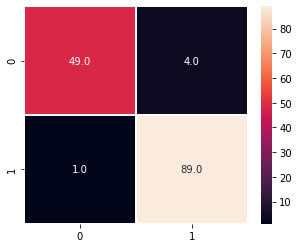

In [52]:
twoclf_pred = twoclf.predict(X_test)
print('Accuracy Value with Two Hidden Layers:')
print(metrics.accuracy_score(y_test, twoclf_pred)*100, "%")
print("")
print("Confustion Matrix:")
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=twoclf_pred)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [53]:
print("Classification Report")
print(classification_report(y_test, twoclf_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



## Activation Function

**What is activation function?**

An activation function is a function that decides whetehr a neuron should be selected or not through calculation of weight sum and further adding bias along with. The main property of the activation function is introducing non-linearity into the output of a neuron.

Some of the variations of Activation functions are:

**1) ReLU Function**

* abbreviation of Rectified Linear Unit
* mostly used to implement hidden layers of Neural Network
* euation $A(x) = max(0, x)$, an output is generated if x is positive else it returns 0
* its value ranges from [0, $\inf$)
* non-linear in nature, since it can easily backpropagate the errors and have multiple leayers of neurons being activated by the ReLU function.
* Compared to tanh and sigmoid, ReLU is less computationally expensive as it involves simpler mathematical operations. Since, only a few neurons are activated the network becomes sparse thus making it more efficient and easier for computation.

**2) Sigmoid Function**

* a function that is plotted as 'S' shaped graph
* Equation: $A=\frac{1}{1+e^{-x}}$
* its value ranges from -2 to +2, thus samll change in x brings about a large change in the value of A

**3) TanH Function**

* also known as Tangent Hyperbolic Function
* works better than sigmoid fuction
* mathematical shifted version of the sigmoid function
* similar to sigmoid function and can be derived from each other
* it is non-linear in nature
* usually used in hidden layers of neural network. Since it's value lies between -1 and +1, the mean for the hidden layer becomes 0 or close to it, thus helping in centering the data. This allows easier learning for the next layer.



## Activation Functions - relu, tanh and sigmoid

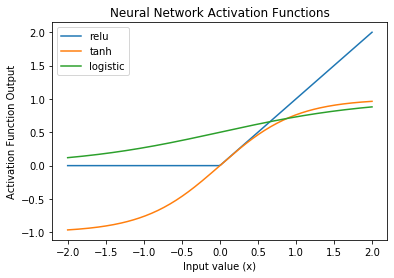

In [12]:
x = np.linspace(-2, 2, 200)

plt.figure(figsize=(6, 4))

plt.plot(x, np.maximum(x, 0), label='relu')
plt.plot(x, np.tanh(x), label='tanh')
plt.plot(x, 1/(1 + np.exp(-x)), label='logistic')
plt.legend()
plt.title("Neural Network Activation Functions")
plt.xlabel("Input value (x)")
plt.ylabel("Activation Function Output")
plt.show()

## Effects of the Activation Function

In [57]:
for activation in ['logistic', 'tanh', 'relu']:
    clf = MLPClassifier(solver='lbfgs', activation=activation, alpha=0.01,
                         hidden_layer_sizes=[10, 10], random_state=0,
                       max_iter=2000).fit(X_train, y_train)
    print("Name of the Activation Function: {}" .format(activation))
    print("=======================================================")
    print('Accuracy of Classifier on Training Set : {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Classifier on Testing Set  : {:.2f}'.format(clf.score(X_test, y_test)))
    clf_pred = clf.predict(X_test)
    print("")
    print("Confustion matrix:")
    print(confusion_matrix(y_test, clf_pred))
    print("")
    print("classification report")
    print(classification_report(y_test, clf_pred))
    print("\n")

Name of the Activation Function: logistic
Accuracy of Classifier on Training Set : 1.00
Accuracy of Classifier on Testing Set  : 0.97

Confustion matrix:
[[51  2]
 [ 3 87]]

classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Name of the Activation Function: tanh
Accuracy of Classifier on Training Set : 1.00
Accuracy of Classifier on Testing Set  : 0.97

Confustion matrix:
[[51  2]
 [ 3 87]]

classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted av

## MLP for Regression

**MLPRegressor** implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.

### Importing LIbraries

In [14]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

### Dataset via Make_Regression of sklearn 

In [15]:
X_reg, y_reg = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=30, random_state=0)

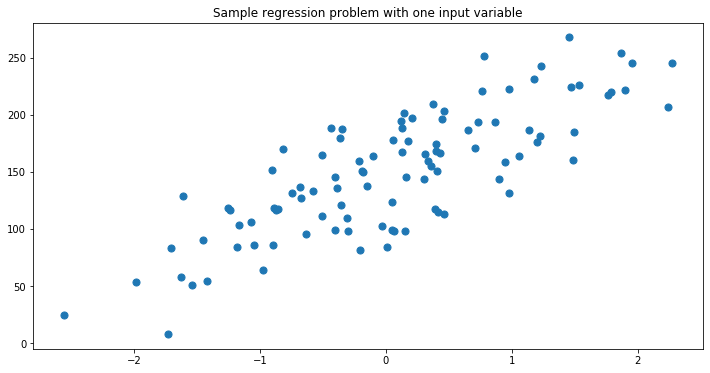

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(X_reg, y_reg, marker='o', s=50)
plt.title("Sample regression problem with one input variable")
plt.show()

### Data Standardization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_reg)

X_reg_scaled = scaler.transform(X_reg)

### Using the Regressor

Both **MLPRegressor** and **MLPClassifier** use parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. Following plot displays varying decision function with value of alpha.

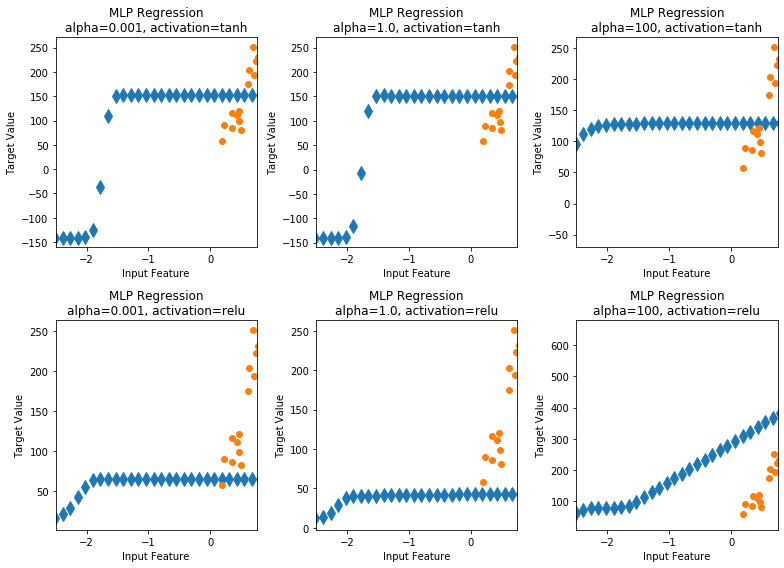

In [18]:
fig, subaxes = plt.subplots(2, 3, figsize=(11, 8))

X_pred = np.linspace(-3, 3, 50).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled[0::5], y_reg[0::5], random_state=0)

for ar, activation in zip(subaxes, ['tanh','relu']):
    for alpha, axis in zip([0.001, 1.0, 100], ar):
        mlp = MLPRegressor(hidden_layer_sizes=[100, 100],
                          activation = activation,
                          alpha = alpha,
                          solver='sgd',
                          max_iter=3500).fit(X_train, y_train)
        y_pred = mlp.predict(X_pred)
        axis.set_xlim([-2.5, 0.75])
        axis.plot(X_pred, y_pred, 'd', markersize=10)
        axis.plot(X_train, y_train, 'o')
        axis.set_xlabel("Input Feature")
        axis.set_ylabel("Target Value")
        axis.set_title('MLP Regression\nalpha={}, activation={}' .format(alpha, activation))
        plt.tight_layout()

 =============================================================================================== Aaqib Ahmad (ML_LAB_11)